In [52]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

In [2]:
import tensorflow as tf
mnist=tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [3]:
x_train.shape

(60000, 28, 28)

In [4]:
y_train[4]

9

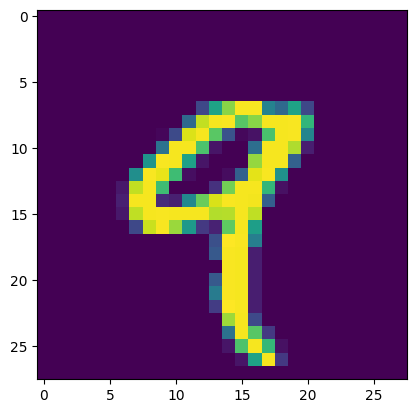

In [5]:
single_image=x_train[4]
plt.imshow(single_image)

In [6]:
to_categorical=tf.keras.utils.to_categorical

In [7]:
y_example=to_categorical(y_train)
y_example[4] #in 4 th poition there is 9, so 9th bit is 1, else everything is 0

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.], dtype=float32)

In [8]:
y_cat_test = to_categorical(y_test,10)
y_cat_train = to_categorical(y_train,10)

In [9]:
x_train = x_train/255
x_test = x_test/255

In [10]:
x_train = x_train.reshape(60000, 28, 28, 1)
x_test = x_test.reshape(10000,28,28,1)

In [11]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten

In [18]:
model=Sequential()

model.add(Conv2D(filters=32,kernel_size=(4,4),strides=(1,1),input_shape=(28,28,1),activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Flatten())

model.add(Dense(128,activation='relu'))

#o/p layer
model.add(Dense(10,activation='softmax'))

model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [19]:
from tensorflow.keras.callbacks import EarlyStopping

early_stop=EarlyStopping(monitor='val_loss',patience=1)

In [20]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 25, 25, 32)        544       
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 12, 12, 32)        0         
 g2D)                                                            
                                                                 
 flatten_1 (Flatten)         (None, 4608)              0         
                                                                 
 dense_2 (Dense)             (None, 128)               589952    
                                                                 
 dense_3 (Dense)             (None, 10)                1290      
                                                                 
Total params: 591786 (2.26 MB)
Trainable params: 591786 (2.26 MB)
Non-trainable params: 0 (0.00 Byte)
__________________

In [21]:
model.fit(x_train,y_cat_train,epochs=10,validation_data=(x_test,y_cat_test),callbacks=[early_stop])

Epoch 1/10
1875/1875 [==============================] - 54s 27ms/step - loss: 0.1399 - accuracy: 0.9581 - val_loss: 0.0487 - val_accuracy: 0.9844
Epoch 2/10
1875/1875 [==============================] - 49s 26ms/step - loss: 0.0487 - accuracy: 0.9844 - val_loss: 0.0410 - val_accuracy: 0.9856
Epoch 3/10
1875/1875 [==============================] - 46s 25ms/step - loss: 0.0326 - accuracy: 0.9898 - val_loss: 0.0668 - val_accuracy: 0.9778


In [22]:
losses = pd.DataFrame(model.history.history)
losses.head()

,loss,accuracy,val_loss,val_accuracy
0,0.139856,0.958050,0.048652,0.9844
1,0.048749,0.984450,0.041020,0.9856
2,0.032555,0.989783,0.066792,0.9778


<Axes: >

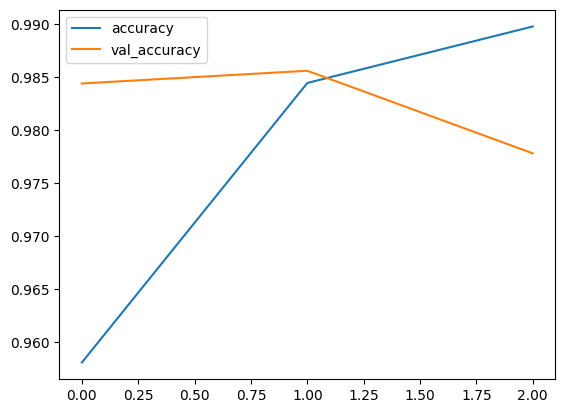

In [23]:
losses[['accuracy','val_accuracy']].plot()

<Axes: >

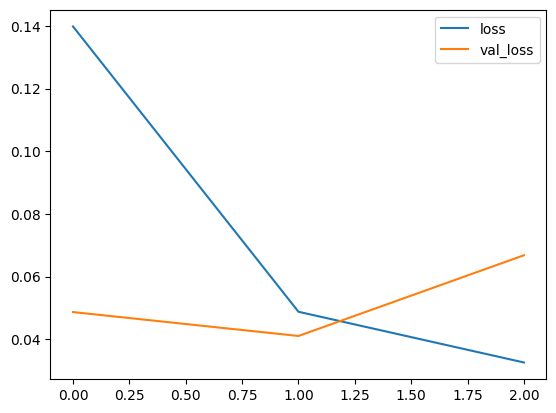

In [24]:
losses[['loss','val_loss']].plot()

In [25]:
print(model.metrics_names)
print(model.evaluate(x_test,y_cat_test,verbose=0))

['loss', 'accuracy']
[0.0667923167347908, 0.9778000116348267]


In [48]:
from sklearn.metrics import classification_report,confusion_matrix
y_pred = model.predict(x_test)
predictions = np.round(y_pred).astype(int)

313/313 [==============================] - 3s 9ms/step


In [49]:
y_pred_multiclass = np.argmax(predictions, axis=1)

In [50]:
print(classification_report(y_test,y_pred_multiclass))

              precision    recall  f1-score   support

           0       0.95      0.99      0.97       980
           1       0.99      1.00      0.99      1135
           2       0.98      0.98      0.98      1032
           3       0.94      1.00      0.97      1010
           4       1.00      0.96      0.98       982
           5       0.98      0.98      0.98       892
           6       0.99      0.98      0.99       958
           7       0.96      1.00      0.98      1028
           8       1.00      0.90      0.95       974
           9       0.97      0.97      0.97      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



In [51]:
confusion_matrix(y_test,y_pred_multiclass)

array([[ 975,    0,    2,    1,    0,    1,    0,    0,    1,    0],
       [   0, 1134,    0,    0,    0,    0,    0,    1,    0,    0],
       [   5,    2, 1013,    4,    0,    0,    0,    8,    0,    0],
       [   1,    0,    0, 1007,    0,    1,    0,    1,    0,    0],
       [  10,    2,    0,    0,  941,    0,    5,    9,    0,   15],
       [   1,    0,    1,   16,    0,  873,    1,    0,    0,    0],
       [   8,    2,    1,    0,    1,    2,  943,    0,    1,    0],
       [   1,    1,    2,    1,    0,    0,    0, 1023,    0,    0],
       [  20,    2,   12,   31,    0,    5,    3,   10,  875,   16],
       [   5,    3,    0,    9,    1,    5,    0,   11,    0,  975]],
      dtype=int64)

<Axes: >

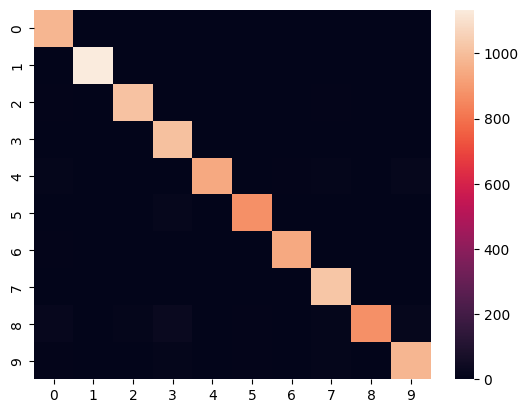

In [53]:
sns.heatmap(confusion_matrix(y_test,y_pred_multiclass))

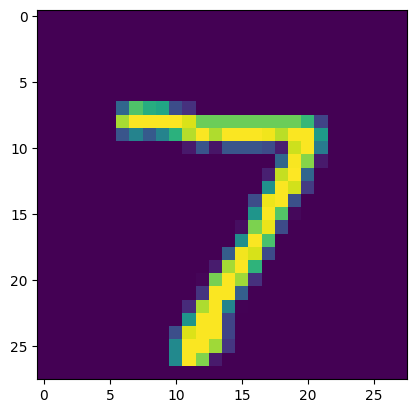

In [54]:
#Predict a single image
my_number = x_test[0]
plt.imshow(my_number.reshape(28,28))

In [57]:
y_pred = model.predict(my_number.reshape(1,28,28,1))
predictions = np.round(y_pred).astype(int)

1/1 [==============================] - 0s 68ms/step


In [59]:
np.argmax(predictions, axis=1)

array([7], dtype=int64)